In [36]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model 
#import statsmodels.tsa.stattools
from pandas.core import datetools

pd.options.mode.chained_assignment = None
import datetime

In [37]:
data = pd.read_excel('DataFileAssignmentUpdated.xls')
data = data[(data.Year < '2011-12-31')]
data.index=data['Year']
data.drop('Year', axis=1, inplace=True)
data.head(5)

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemale,SuicideAll,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-31,ALBANIA,3092600.0,1700930.0,1391670.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,73.0,48.0,25.0,44.0,34.0,10.0,154.0,118.0,36.0
1988-12-31,ALBANIA,3155400.0,1735470.0,1419930.0,303.0,242.0,61.0,39.0,28.0,11.0,...,0.0,63.0,41.0,22.0,49.0,40.0,9.0,181.0,132.0,49.0
1989-12-31,ALBANIA,3218200.0,1770010.0,1448190.0,356.0,280.0,76.0,28.0,23.0,5.0,...,0.0,68.0,53.0,15.0,69.0,51.0,18.0,177.0,139.0,38.0


In [3]:
#data.fillna(method='ffill', inplace=True)
#data.fillna(method='bfill', inplace=True)

In [38]:
data.describe()

,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,DrowingAll,...,PoisonFemale,SuicideAll,SuicideMale,SuicideFemale,AssaultAll,AssaultMale,AssaultFemale,OtherAll,OtherMale,OtherFemale
count,3.588000e+03,3.588000e+03,3.588000e+03,2555.00000,2555.000000,2555.000000,2561.000000,2561.000000,2561.000000,2545.000000,...,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2555.000000,2555.000000,2555.000000
mean,1.646761e+07,8.674634e+06,7.792979e+06,2976.50411,2247.824658,728.679452,1126.260445,611.711050,514.549395,643.796071,...,252.819992,2352.401015,1806.811402,545.589613,1794.689965,1513.819992,280.869973,3471.148728,2536.780431,934.368297
std,3.507952e+07,1.846147e+07,1.661923e+07,7164.89803,5311.000953,1894.998564,2552.748962,1358.948711,1286.770277,1781.655212,...,1279.862687,6518.026561,5151.900657,1428.677778,6154.073488,5306.484516,1003.056226,9267.540044,7099.141563,2281.526251
min,2.000000e+03,1.070000e+03,9.300000e+02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.211500e+05,2.219670e+05,2.002252e+05,86.00000,68.000000,17.000000,20.000000,14.000000,5.000000,17.000000,...,1.000000,40.000000,30.000000,10.000000,23.000000,17.000000,5.000000,94.000000,66.000000,27.000000
50%,4.333400e+06,2.294678e+06,2.037860e+06,551.00000,421.000000,129.000000,180.000000,112.000000,60.000000,107.000000,...,20.000000,404.000000,308.000000,95.000000,144.000000,105.000000,36.000000,616.000000,442.000000,164.000000
75%,1.283355e+07,6.649371e+06,6.129380e+06,2177.50000,1683.500000,498.000000,953.000000,504.000000,398.000000,384.000000,...,91.000000,1604.000000,1268.000000,429.000000,572.000000,412.000000,130.000000,2611.500000,1866.000000,765.500000
max,3.098760e+08,1.626849e+08,1.471911e+08,51855.00000,36712.000000,15325.000000,26014.000000,13053.000000,12961.000000,20458.000000,...,17475.000000,61886.000000,51464.000000,10673.000000,52243.000000,47777.000000,11297.000000,104611.000000,82215.000000,22476.000000


In [39]:
r = 100000
data['TotalPopRev'] = round(data.TotalPop/ r , 1)
data['PopMaleRev'] = round(data.PopMale/r , 1)
data['PopFemaleRev'] = round(data.PopFemale/r , 1)
data['TransportAccAllRev'] = round(data.TransportAccAll*r / data.TotalPop, 1)
data['TransportAccMaleRev'] = round(data.TransportAccMale*r / data.TotalPop, 1)
data['TransportAccFemaleRev'] = round(data.TransportAccFemale*r / data.TotalPop, 1)
data['FallsAllRev'] = round(data.FallsAll*r / data.TotalPop, 1)
data['FallsMaleRev'] = round(data.FallsMale*r / data.TotalPop, 1)
data['FallsFemaleRev'] = round(data.FallsFemale*r / data.TotalPop, 1)
data['DrowingAllRev'] = round(data.DrowingAll*r / data.TotalPop, 1)
data['DrowningMaleRev'] = round(data.DrowningMale*r / data.TotalPop, 1)
data['DrowningFemaleRev'] = round(data.DrowningFemale*r / data.TotalPop, 1)
data['FireAllRev'] = round(data.FireAll*r / data.TotalPop, 1)
data['FireMaleRev'] = round(data.FireMale*r / data.TotalPop, 1)
data['FireFemaleRev'] = round(data.FireFemale*r / data.TotalPop, 1)
data['PoisonAllRev'] = round(data.PoisonAll*r / data.TotalPop, 1)
data['PoisonMaleRev'] = round(data.PoisonMale*r / data.TotalPop, 1)
data['PoisonFemaleRev'] = round(data.PoisonFemale*r / data.TotalPop, 1)
data['SuicideAllRev'] = round(data.SuicideAll*r / data.TotalPop, 1)
data['SuicideMaleRev'] = round(data.SuicideMale*r / data.TotalPop, 1)
data['SuicideFemaleRev'] = round(data.SuicideFemale*r / data.TotalPop, 1)
data['AssaultAllRev'] = round(data.AssaultAll*r / data.TotalPop, 1)
data['AssaultMaleRev'] = round(data.AssaultMale*r / data.TotalPop, 1)
data['AssaultFemaleRev'] = round(data.AssaultFemale*r / data.TotalPop, 1)
data['OtherAllRev'] = round(data.OtherAll*r / data.TotalPop, 1)
data['OtherMaleRev'] = round(data.OtherMale*r / data.TotalPop, 1)
data['OtherFemaleRev'] = round(data.OtherFemale*r / data.TotalPop, 1)
data.head()

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemaleRev,SuicideAllRev,SuicideMaleRev,SuicideFemaleRev,AssaultAllRev,AssaultMaleRev,AssaultFemaleRev,OtherAllRev,OtherMaleRev,OtherFemaleRev
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,ALBANIA,2967000.0,1631850.0,1335150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-12-31,ALBANIA,3029800.0,1666390.0,1363410.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-12-31,ALBANIA,3092600.0,1700930.0,1391670.0,305.0,236.0,69.0,31.0,26.0,5.0,...,0.0,2.4,1.6,0.8,1.4,1.1,0.3,5.0,3.8,1.2
1988-12-31,ALBANIA,3155400.0,1735470.0,1419930.0,303.0,242.0,61.0,39.0,28.0,11.0,...,0.0,2.0,1.3,0.7,1.6,1.3,0.3,5.7,4.2,1.6
1989-12-31,ALBANIA,3218200.0,1770010.0,1448190.0,356.0,280.0,76.0,28.0,23.0,5.0,...,0.0,2.1,1.6,0.5,2.1,1.6,0.6,5.5,4.3,1.2


In [40]:
data.to_excel(r'DataFileAssignment_Rev.xls')

In [7]:
ld = list(data)
ld

['Country',
 'TotalPop',
 'PopMale',
 'PopFemale',
 'TransportAccAll',
 'TransportAccMale',
 'TransportAccFemale',
 'FallsAll',
 'FallsMale',
 'FallsFemale',
 'DrowingAll',
 'DrowningMale',
 'DrowningFemale',
 'FireAll',
 'FireMale',
 'FireFemale',
 'PoisonAll',
 'PoisonMale',
 'PoisonFemale',
 'SuicideAll',
 'SuicideMale',
 'SuicideFemale',
 'AssaultAll',
 'AssaultMale',
 'AssaultFemale',
 'OtherAll',
 'OtherMale',
 'OtherFemale',
 'TotalPopRev',
 'PopMaleRev',
 'PopFemaleRev',
 'TransportAccAllRev',
 'TransportAccMaleRev',
 'TransportAccFemaleRev',
 'FallsAllRev',
 'FallsMaleRev',
 'FallsFemaleRev',
 'DrowingAllRev',
 'DrowningMaleRev',
 'DrowningFemaleRev',
 'FireAllRev',
 'FireMaleRev',
 'FireFemaleRev',
 'PoisonAllRev',
 'PoisonMaleRev',
 'PoisonFemaleRev',
 'SuicideAllRev',
 'SuicideMaleRev',
 'SuicideFemaleRev',
 'AssaultAllRev',
 'AssaultMaleRev',
 'AssaultFemaleRev',
 'OtherAllRev',
 'OtherMaleRev',
 'OtherFemaleRev']

In [109]:
Intl = pd.DataFrame(columns=[])
Intl['PopMaleRev'] = data.groupby(['Year'])['PopMaleRev'].transform('mean')
Intl['PopFemaleRev'] = data.groupby(['Year'])['PopFemaleRev'].transform('mean')
Intl['TotalPopRev'] = data.groupby(['Year'])['TotalPopRev'].transform('mean')
Intl['TransportAccMaleRev'] = data.groupby(['Year'])['TransportAccMaleRev'].transform('mean')
Intl['TransportAccFemaleRev'] = data.groupby(['Year'])['TransportAccFemaleRev'].transform('mean')
Intl['TransportAccAllRev'] = data.groupby(['Year'])['TransportAccAllRev'].transform('mean')
Intl['FallsMaleRev'] = data.groupby(['Year'])['FallsMaleRev'].transform('mean')
Intl['FallsFemaleRev'] = data.groupby(['Year'])['FallsFemaleRev'].transform('mean')
Intl['FallsAllRev'] = data.groupby(['Year'])['FallsAllRev'].transform('mean')
Intl['AssaultMaleRev'] = data.groupby(['Year'])['AssaultMaleRev'].transform('mean')
Intl['AssaultFemaleRev'] = data.groupby(['Year'])['AssaultFemaleRev'].transform('mean')
Intl['AssaultAllRev'] = data.groupby(['Year'])['AssaultAllRev'].transform('mean')
Intl['SuicideMaleRev'] = data.groupby(['Year'])['SuicideMaleRev'].transform('mean')
Intl['SuicideFemaleRev'] = data.groupby(['Year'])['SuicideFemaleRev'].transform('mean')
Intl['SuicideAllRev'] = data.groupby(['Year'])['SuicideAllRev'].transform('mean')
Intl['OtherMaleRev'] = data.groupby(['Year'])['OtherMaleRev'].transform('mean')
Intl['OtherFemaleRev'] = data.groupby(['Year'])['OtherFemaleRev'].transform('mean')
Intl['OtherAllRev'] = data.groupby(['Year'])['OtherAllRev'].transform('mean')
Intl['FireMaleRev'] = data.groupby(['Year'])['FireMaleRev'].transform('mean')
Intl['FireFemaleRev'] = data.groupby(['Year'])['FireFemaleRev'].transform('mean')
Intl['FireAllRev'] = data.groupby(['Year'])['FireAllRev'].transform('mean')
Intl['PoisonMaleRev'] = data.groupby(['Year'])['PoisonMaleRev'].transform('mean')
Intl['PoisonFemaleRev'] = data.groupby(['Year'])['PoisonFemaleRev'].transform('mean')
Intl['PoisonAllRev'] = data.groupby(['Year'])['PoisonAllRev'].transform('mean')
Intl['DrowningMaleRev'] = data.groupby(['Year'])['DrowningMaleRev'].transform('mean')
Intl['DrowningFemaleRev'] = data.groupby(['Year'])['DrowningFemaleRev'].transform('mean')
Intl['DrowingAllRev'] = data.groupby(['Year'])['DrowingAllRev'].transform('mean')
Intl.head()

,PopMaleRev,PopFemaleRev,TotalPopRev,TransportAccMaleRev,TransportAccFemaleRev,TransportAccAllRev,FallsMaleRev,FallsFemaleRev,FallsAllRev,AssaultMaleRev,...,OtherAllRev,FireMaleRev,FireFemaleRev,FireAllRev,PoisonMaleRev,PoisonFemaleRev,PoisonAllRev,DrowningMaleRev,DrowningFemaleRev,DrowingAllRev
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,75.702174,67.960870,143.664493,110.086076,38.670886,148.754430,52.401266,82.172152,134.572152,11.284810,...,63.125316,3.708861,3.115190,6.825316,6.977215,2.410127,9.392405,12.533766,2.900000,15.437662
1986-12-31,76.663043,68.834783,145.497826,107.102469,41.396296,148.497531,48.830864,82.393827,131.220988,12.155556,...,56.603704,3.983951,2.780247,6.754321,7.391358,2.419753,9.812346,12.305000,2.963750,15.272500
1987-12-31,77.632609,69.699275,147.325362,91.839326,36.905618,128.747191,44.864045,75.323596,120.183146,10.359551,...,53.229213,4.729213,2.916854,7.651685,4.177528,1.371910,5.556180,9.318182,2.523864,11.842045
1988-12-31,78.591304,70.564493,149.157971,93.417284,38.827160,132.245679,49.771605,79.623457,129.395062,10.756790,...,59.523457,4.192593,2.583951,6.767901,4.808642,1.733333,6.548148,9.092500,3.325000,12.416250
1989-12-31,79.555797,71.434783,150.988406,98.003614,40.939759,138.946988,52.980723,87.755422,140.736145,12.790361,...,60.540964,4.345783,4.261446,8.604819,5.169880,1.542169,6.715663,10.204878,3.089024,13.295122


In [42]:
Intld = Intl[1:26]

In [43]:
Intld.to_excel(r'DataFileAssignment_Intl.xls')

In [44]:
Canada = data.loc[data['Country']=='CANADA']
USA = data.loc[data['Country']=='UNITED STATES OF AMERICA']

In [45]:
Canada.fillna(method='ffill', inplace=True)
Canada.fillna(method='bfill', inplace=True)
Canada

,Country,TotalPop,PopMale,PopFemale,TransportAccAll,TransportAccMale,TransportAccFemale,FallsAll,FallsMale,FallsFemale,...,PoisonFemaleRev,SuicideAllRev,SuicideMaleRev,SuicideFemaleRev,AssaultAllRev,AssaultMaleRev,AssaultFemaleRev,OtherAllRev,OtherMaleRev,OtherFemaleRev
Year,,,,,,,,,,,,,,,,,,,,,
1985-12-31,CANADA,25848000.0,13699440.0,12148560.0,4573.0,3287.0,1286.0,1829.0,902.0,927.0,...,0.4,12.6,9.9,2.7,2.1,1.3,0.8,7.6,5.5,2.2
1986-12-31,CANADA,26210800.0,13891724.0,12319076.0,4440.0,3225.0,1215.0,2012.0,945.0,1067.0,...,0.5,14.0,10.9,3.1,2.0,1.3,0.7,7.2,5.1,2.1
1987-12-31,CANADA,26573600.0,14084008.0,12489592.0,4669.0,3391.0,1278.0,1907.0,868.0,1039.0,...,0.5,13.5,10.5,3.0,2.1,1.4,0.7,8.2,5.8,2.4
1988-12-31,CANADA,26936400.0,14276292.0,12660108.0,4445.0,3274.0,1171.0,2100.0,990.0,1110.0,...,0.5,13.0,10.1,2.9,1.8,1.2,0.6,6.9,4.9,2.1
1989-12-31,CANADA,27299200.0,14468576.0,12830624.0,4693.0,3337.0,1356.0,1994.0,954.0,1040.0,...,0.6,12.8,9.9,2.9,2.0,1.3,0.7,6.4,4.5,1.9
1990-12-31,CANADA,27662000.0,14660860.0,13001140.0,4135.0,2978.0,1157.0,2064.0,982.0,1082.0,...,0.6,12.2,9.7,2.6,2.0,1.3,0.7,6.0,4.2,1.8
1991-12-31,CANADA,27989400.0,14834382.0,13155018.0,3932.0,2803.0,1129.0,2053.0,942.0,1111.0,...,0.8,12.8,10.3,2.6,2.2,1.4,0.8,5.8,4.1,1.7
1992-12-31,CANADA,28316800.0,15007904.0,13308896.0,3741.0,2647.0,1094.0,2138.0,985.0,1153.0,...,0.7,13.1,10.3,2.8,2.1,1.4,0.7,5.6,4.0,1.7
1993-12-31,CANADA,28644200.0,15181426.0,13462774.0,3837.0,2686.0,1151.0,2238.0,1023.0,1215.0,...,0.8,13.3,10.5,2.8,1.8,1.2,0.6,5.6,3.7,1.8


In [46]:
USA.fillna(method='ffill', inplace=True)
USA.fillna(method='bfill', inplace=True)
USA.TransportAccAllRev.describe()

count    26.000000
mean     17.069231
std       2.343804
min      12.100000
25%      16.150000
50%      16.700000
75%      17.875000
max      20.900000
Name: TransportAccAllRev, dtype: float64

In [47]:
Intld.fillna(method='ffill', inplace=True)
Intld.fillna(method='bfill', inplace=True)
Intld.TransportAccAllRev.describe()

count     25.000000
mean      91.091488
std       32.041220
min       47.499115
25%       61.035780
50%       84.258824
75%      121.046429
max      148.497531
Name: TransportAccAllRev, dtype: float64

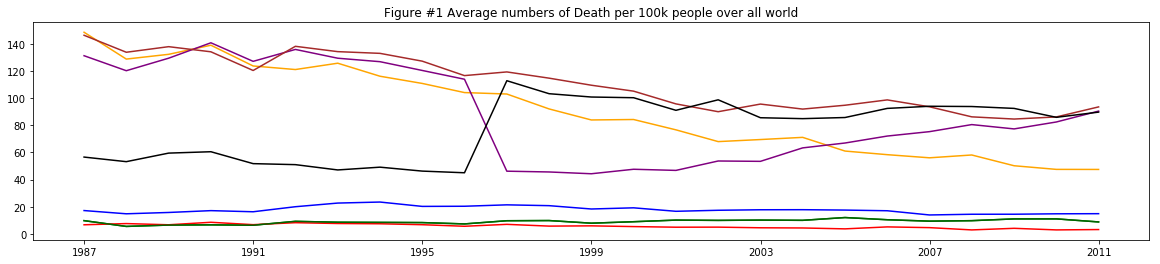

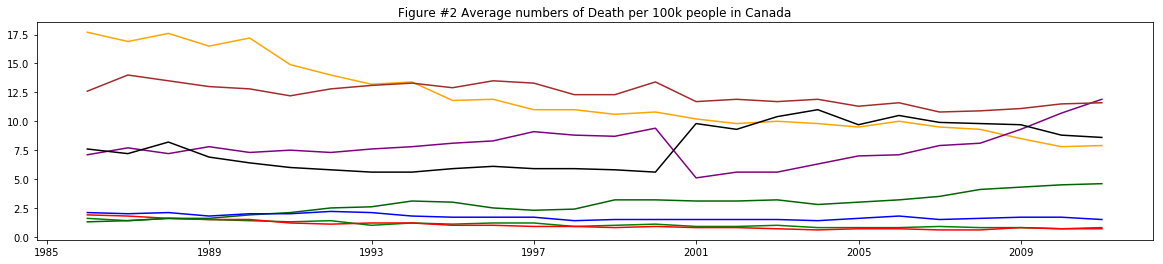

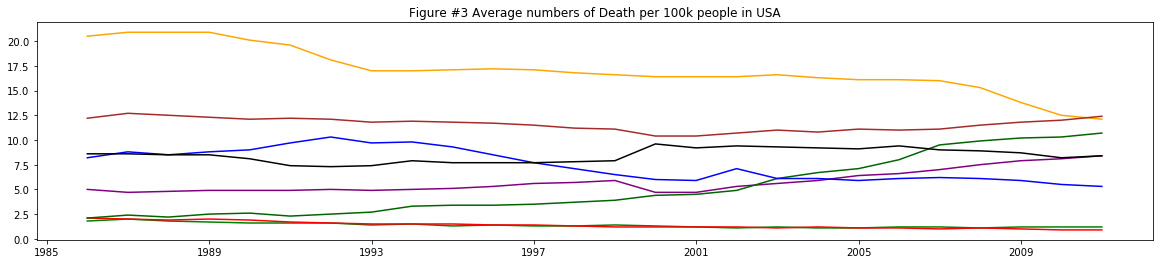

In [48]:
plt.figure(figsize=(20,4))
plt.title("Figure #1 Average numbers of Death per 100k people over all world")
plt.plot(Intld['TransportAccAllRev'], color = 'orange')
plt.plot(Intld['FallsAllRev'], color = 'purple')
plt.plot(Intld['DrowingAllRev'], color = 'green')
plt.plot(Intld['FireAllRev'], color = 'red')
plt.plot(Intld['PoisonAllRev'], color = 'darkgreen')
plt.plot(Intld['SuicideAllRev'], color = 'brown')
plt.plot(Intld['AssaultAllRev'], color = 'blue')
plt.plot(Intld['OtherAllRev'], color = 'k')
plt.show()
plt.figure(figsize=(20,4))
plt.title("Figure #2 Average numbers of Death per 100k people in Canada")
plt.plot(Canada['TransportAccAllRev'], color = 'orange')
plt.plot(Canada['FallsAllRev'], color = 'purple')
plt.plot(Canada['DrowingAllRev'], color = 'green')
plt.plot(Canada['FireAllRev'], color = 'red')
plt.plot(Canada['PoisonAllRev'], color = 'darkgreen')
plt.plot(Canada['SuicideAllRev'], color = 'brown')
plt.plot(Canada['AssaultAllRev'], color = 'blue')
plt.plot(Canada['OtherAllRev'], color = 'k')
plt.show()
plt.figure(figsize=(20,4))
plt.title("Figure #3 Average numbers of Death per 100k people in USA")
plt.plot(USA['TransportAccAllRev'], color = 'orange')
plt.plot(USA['FallsAllRev'], color = 'purple')
plt.plot(USA['DrowingAllRev'], color = 'green')
plt.plot(USA['FireAllRev'], color = 'red')
plt.plot(USA['PoisonAllRev'], color = 'darkgreen')
plt.plot(USA['SuicideAllRev'], color = 'brown')
plt.plot(USA['AssaultAllRev'], color = 'blue')
plt.plot(USA['OtherAllRev'], color = 'k')
plt.show()

Poison:

    Agricultural chemicals /
    Industrial chemicals /
    Drugs and health care products /
    Poisons of biological origin /
    Radiation
    


Q1: What is the predicted transportation death number of 2011?

Q2: When the death number of poison cross over the death number of transportation?

In [68]:
linear_mod = linear_model.LinearRegression()
dates = list(Canada.index.year)
numTA = list(Canada.TransportAccAllRev)
type(dates)
dates

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [69]:
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
type(dates)
dates

array([[1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010]], dtype=int64)

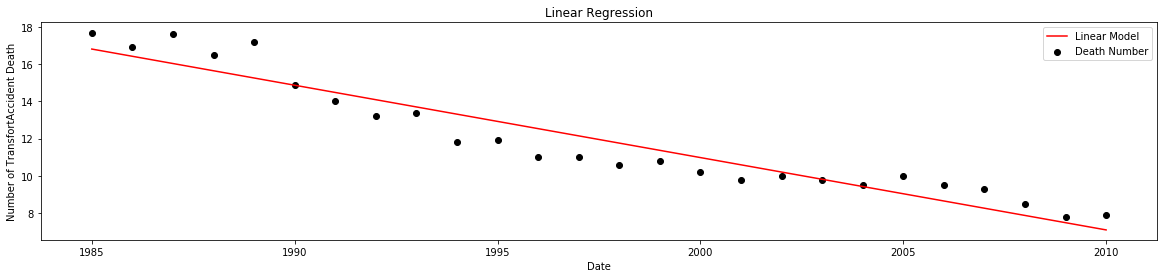

In [51]:
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of TransfortAccident Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [115]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the last three years' transport accident death is " , numTA[-3], numTA[-2], numTA[-1] )
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the last three years' transport accident death is  [ 7.6] [ 6.9] [ 8.4]
the predicted numebr of transport accident death in  2011  :  9.9
coefficient :  0.00923076923077


In [58]:
y = 2012
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
y = 2013
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
y = 2014
predicted_numTA = linear_mod.predict(y)[0][0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )

the predicted numebr of transport accident death in  2012  :  6.3
the predicted numebr of transport accident death in  2013  :  5.9
the predicted numebr of transport accident death in  2014  :  5.5


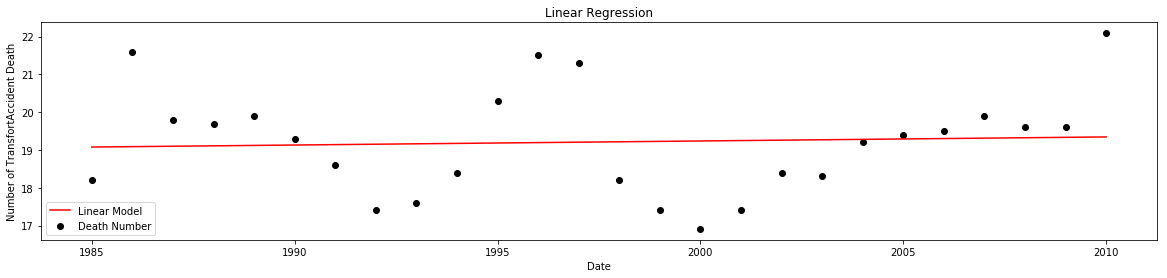

In [102]:
# Transport - Brazil

BRZ = data.loc[data['Country']=='BRAZIL']
BRZ.fillna(method='ffill', inplace=True)
BRZ.fillna(method='bfill', inplace=True)

linear_mod = linear_model.LinearRegression()
dates = list(BRZ.index.year)
numTA = list(BRZ.TransportAccAllRev)
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of TransfortAccident Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [114]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the predicted numebr of transport accident death in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the predicted numebr of transport accident death in  2011  :  9.9
coefficient :  0.00923076923077


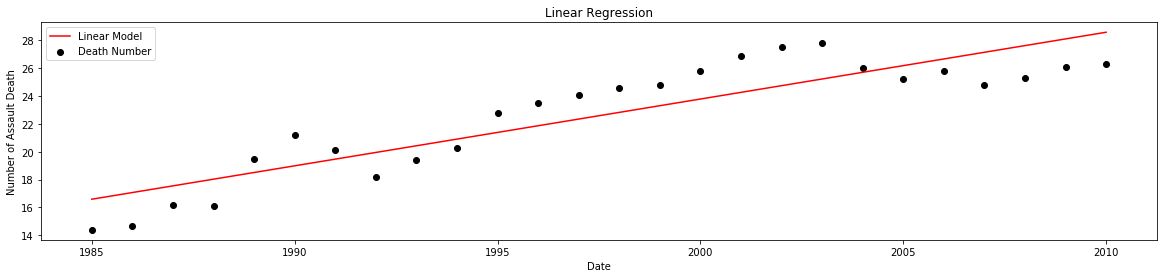

In [98]:
# Murder - Brazil 

linear_mod = linear_model.LinearRegression()
dates = list(BRZ.index.year)
numTA = list(BRZ.AssaultAllRev)
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of Assault Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [113]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the predicted numebr of murder death of Brazil in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the predicted numebr of murder death of Brazil in  2011  :  9.9
coefficient :  0.00923076923077


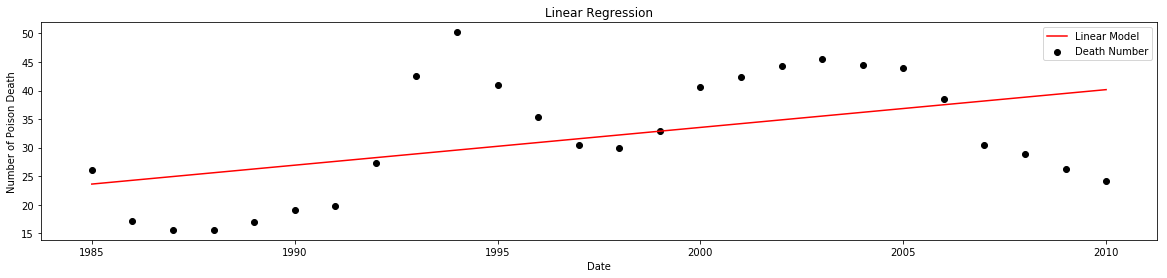

In [103]:
# Poison - Russia

RUS = data.loc[data['Country']=='RUSSIAN FEDERATION']
RUS.fillna(method='ffill', inplace=True)
RUS.fillna(method='bfill', inplace=True)

linear_mod = linear_model.LinearRegression()
dates = list(RUS.index.year)
numTA = list(RUS.PoisonAllRev)
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of Poison Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [105]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the predicted numebr of poison death of Russia in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the predicted numebr of poison death of Russia in  2011  :  40.8
coefficient :  0.661777777778


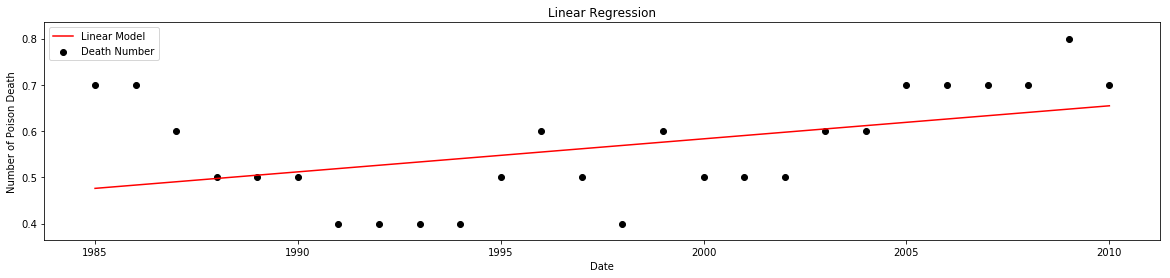

In [106]:
# suicide - japan
JPN = data.loc[data['Country']=='JAPAN']
JPN.fillna(method='ffill', inplace=True)
JPN.fillna(method='bfill', inplace=True)

linear_mod = linear_model.LinearRegression()
dates = list(JPN.index.year)
numTA = list(JPN.PoisonAllRev)
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of Poison Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [107]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the predicted numebr of suicide death of Japan in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the predicted numebr of suicide death of Japan in  2011  :  0.7
coefficient :  0.0071452991453


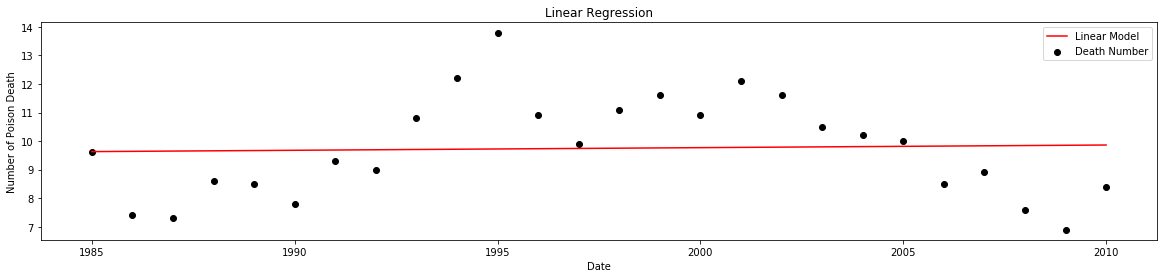

In [111]:
# drowing - russia
RUS = data.loc[data['Country']=='RUSSIAN FEDERATION']
RUS.fillna(method='ffill', inplace=True)
RUS.fillna(method='bfill', inplace=True)

linear_mod = linear_model.LinearRegression()
dates = list(RUS.index.year)
numTA = list(RUS.DrowingAllRev)
dates = np.reshape(dates, (len(dates),1))
numTA = np.reshape(numTA, (len(numTA),1))
linear_mod.fit(dates, numTA)
plt.figure(figsize=(20,4))
plt.scatter(dates, numTA, color= 'black', label= 'Death Number')
plt.plot(dates, linear_mod.predict(dates), color= 'red', label='Linear Model')
plt.xlabel('Date')
plt.ylabel('Number of Poison Death')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [112]:
y = 2011
predicted_numTA = linear_mod.predict(y)[0][0]
coefficient = linear_mod.coef_[0][0]
constant = linear_mod.intercept_[0]
print("the predicted numebr of drowing death of Russia in ", y, " : " , round(predicted_numTA,1) )
print("coefficient : ", coefficient)

the predicted numebr of drowing death of Russia in  2011  :  9.9
coefficient :  0.00923076923077


# Addition

In [71]:
cs = Canada.TransportAccAllRev
type(cs)

pandas.core.series.Series

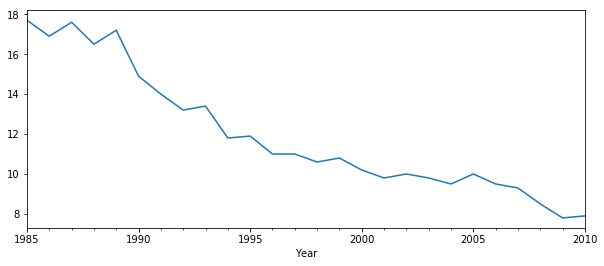

In [79]:
plt.figure(figsize=(10,4))
cs.plot()
plt.show()

Quick Check for Autocorrelation for Canada's transport death

C:\Users\joonho.ye\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


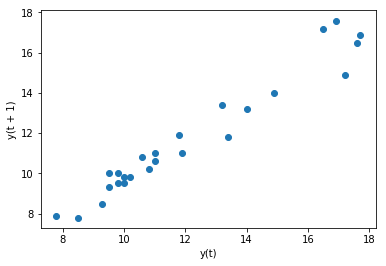

In [85]:
#import pandas.plotting.lag_plot as lag_plot
from pandas.tools.plotting import lag_plot
lag_plot(cs)
plt.show()

In [87]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(cs.values)
df = concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
result = df.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.973891
t+1  0.973891  1.000000


0.97 : it shows strong corelation between the observation and the lag = 1 value.

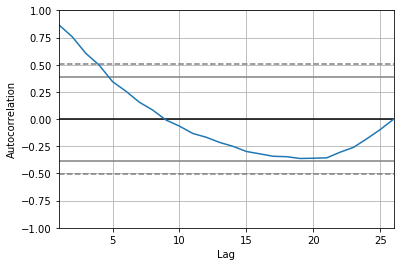

In [93]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(cs)
plt.show()

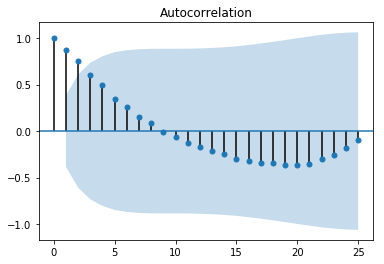

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cs, lags=25)
plt.show()

# Stationarity testing

In [73]:
type(Canada)
cd = Canada.drop(['Country',
 'TotalPop',
 'PopMale',
 'PopFemale',
 'TransportAccAll',
 'TransportAccMale',
 'TransportAccFemale',
 'FallsAll',
 'FallsMale',
 'FallsFemale',
 'DrowingAll',
 'DrowningMale',
 'DrowningFemale',
 'FireAll',
 'FireMale',
 'FireFemale',
 'PoisonAll',
 'PoisonMale',
 'PoisonFemale',
 'SuicideAll',
 'SuicideMale',
 'SuicideFemale',
 'AssaultAll',
 'AssaultMale',
 'AssaultFemale',
 'OtherAll',
 'OtherMale',
 'OtherFemale',
 'TotalPopRev',
 'PopMaleRev',
 'PopFemaleRev',
 'TransportAccMaleRev',
 'TransportAccFemaleRev',
 'FallsAllRev',
 'FallsMaleRev',
 'FallsFemaleRev',
 'DrowingAllRev',
 'DrowningMaleRev',
 'DrowningFemaleRev',
 'FireAllRev',
 'FireMaleRev',
 'FireFemaleRev',
 'PoisonAllRev',
 'PoisonMaleRev',
 'PoisonFemaleRev',
 'SuicideAllRev',
 'SuicideMaleRev',
 'SuicideFemaleRev',
 'AssaultAllRev',
 'AssaultMaleRev',
 'AssaultFemaleRev',
 'OtherAllRev',
 'OtherMaleRev',
 'OtherFemaleRev'], axis = 1)

cd

,TransportAccAllRev,Eins
Year,,
1985-12-31,17.7,1.0
1986-12-31,16.9,1.0
1987-12-31,17.6,1.0
1988-12-31,16.5,1.0
1989-12-31,17.2,1.0
1990-12-31,14.9,1.0
1991-12-31,14.0,1.0
1992-12-31,13.2,1.0
1993-12-31,13.4,1.0


In [42]:
from pandas.core import datetools
import pandas.tseries
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=3,center=False).mean()

    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=3,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

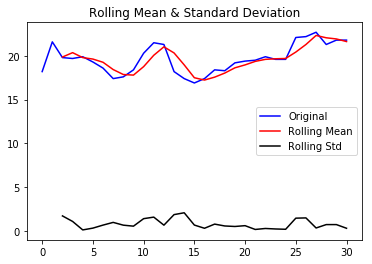

Results of Dickey-Fuller Test:
Test Statistic                 -2.019408
p-value                         0.278129
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [43]:
ts = map(lambda x: x[0], numTA)
s = pd.Series(ts)
test_stationarity(s)

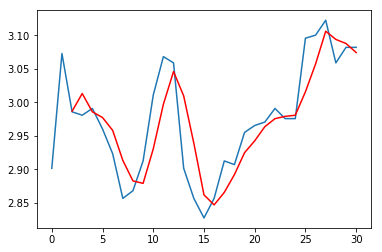

In [45]:
s_log = np.log(s)
moving_avg = pd.Series.rolling(s_log, 3).mean()
plt.plot(s_log)
plt.plot(moving_avg, color='red')

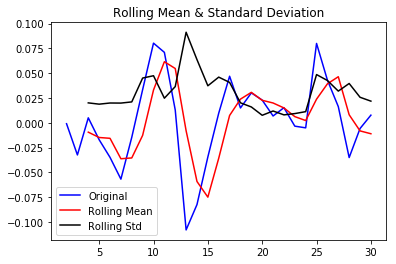

Results of Dickey-Fuller Test:
Test Statistic                 -4.261505
p-value                         0.000518
#Lags Used                      2.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [46]:
s_log_moving_avg_diff = s_log - moving_avg
s_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(s_log_moving_avg_diff)

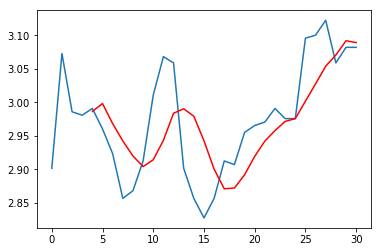

In [47]:
moving_avg = pd.Series.rolling(s_log, 5).mean()
plt.plot(s_log)
plt.plot(moving_avg, color='red')

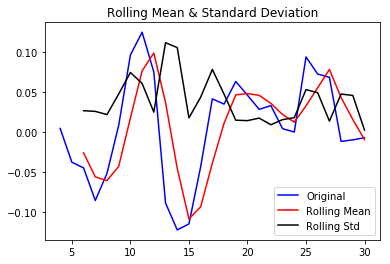

Results of Dickey-Fuller Test:
Test Statistic                 -4.338200
p-value                         0.000381
#Lags Used                      2.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [50]:
s_log_moving_avg_diff = s_log - moving_avg
s_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(s_log_moving_avg_diff)